In [18]:
import os
import pyarrow.parquet as pq
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_notebook
import seaborn as sns

In [19]:
output_notebook()

Loading BokehJS ...

In [20]:
files = [f'data{os.sep}{d}' for d in os.listdir('data') if '.csv' in d]
print(files)

['data/vin=VF1RFA00357138740.csv', 'data/vin=VF1RFA00257138714.csv']


In [21]:
print(f'Loading Aggregated files')
df_agg_1 = pd.read_csv(files[0])
df_agg_2 = pd.read_csv(files[1])

Loading Aggregated files


In [22]:
df_agg_1.shape

(6586, 65)

In [23]:
df_agg_2.shape

(1726, 65)

In [24]:
df_agg_1.columns.tolist()

['Vehicle_Number',
 'Ambiant_Pressure',
 'Canister_Controler',
 'Current_for_Injector_Opening',
 'Distance_Km',
 'Lambda_Adapation',
 'Gear_Engaged',
 'Lambda_Control_1',
 'Lambda_Control_2',
 'MAF_Before_Compressor',
 'Engine_MAF',
 'Fuel_Mass_Adapation',
 'Engine_Speed',
 'Turbo_Turbine_Speed',
 'Injection_Number',
 'Fuel_Pressure_at_Inlet_Pump',
 'Fuel_Pressure',
 'Turbo_Waste_Gate_Position',
 'Pedal_Position',
 'Turbo_Waste_Gate_Controler',
 'Water_Pump_Controler',
 'Engine_Thermostat_Controler',
 'Engine_Air_Throttle_Controler',
 'Fuel_Pump_Delivery',
 'Segment_Number',
 'Injector_Adapation1',
 'Injector_Adapation2',
 'Injector_Adapation3',
 'Injector_Adapation4',
 'Injector_Adapation5',
 'Injector_Adapation6',
 'Injector_Adapation7',
 'Injector_Adapation8',
 'Injector_Adapation9',
 'Injector_Adapation10',
 'Injector_Adapation11',
 'Injector_Adapation12',
 'Injector_Adapation13',
 'Injector_Adapation14',
 'Injector_Adapation15',
 'Injector_Adapation16',
 'Injector_Adapation17',
 '

In [25]:
df_agg_1['timestamp'] = pd.to_datetime(df_agg_1['timestamp'], unit = 's')
df_agg_2['timestamp'] = pd.to_datetime(df_agg_2['timestamp'], unit ='s')
print(max(df_agg_1['timestamp']))
print(min(df_agg_1['timestamp']))
print(max(df_agg_2['timestamp']))
print(min(df_agg_2['timestamp']))
print(df_agg_1.shape)
print(df_agg_2.shape)
df_agg_1.head(n=5)

2018-08-09 05:25:51
2017-12-11 17:19:07
2018-08-27 16:23:19
2018-06-13 17:22:21
(6586, 65)
(1726, 65)


Vehicle_Number  Ambiant_Pressure  Canister_Controler  \
0  VF1RFA00357138740        980.774720            8.806135   
1  VF1RFA00357138740        963.088938            7.982265   
2  VF1RFA00357138740        970.696425           84.499417   
3  VF1RFA00357138740        910.430810           43.313104   
4  VF1RFA00357138740        985.873937           23.192817   

   Current_for_Injector_Opening  Distance_Km  Lambda_Adapation  Gear_Engaged  \
0                     15.596389        20710         -0.682068      5.921257   
1                     14.641683        18448          0.878906      6.000000   
2                     12.106834        18898         -0.881958      6.000000   
3                     15.822132        21271          1.069641      6.000000   
4                           NaN        11544          3.022766      5.000000   

   Lambda_Control_1  Lambda_Control_2  MAF_Before_Compressor      ...        \
0         14.573935         18.038272              68.969100      ...         
1         11.637842         16.047049              35.964943      ...         
2         18.247602         18.072150              19.805319      ...         
3          3.377731         13.283162             151.298312      ...         
4         26.704967         24.859796                    NaN      ...         

    time_30_s           timestamp  Engine_Oil_Temperature            Trt  \
0  521.065868 2018-08-01 17:29:43               97.000000  394680.244351   
1  699.457476 2018-07-20 07:32:25              100.000406  295684.537912   
2  143.856192 2018-07-23 07:36:25               96.000000  312699.890871   
3  737.771656 2018-08-05 17:09:28              101.669416  429535.059142   
4         NaN 2018-01-31 04:04:10               91.860112  430819.087968   

   Battery_Voltage  Voltage_Boost_Injector_control  Pump_Adaptation_1  \
0        13.471668                       64.546068          -0.006349   
1        14.470404                       64.364013          -0.006451   
2        14.111148                       64.396522          -0.003889   
3        13.270324                       64.539220          -0.001216   
4        13.568850                             NaN          -0.005205   

   Waste_Gate_Adapatation_1  Waste_Gate_Adapatation_2  Vehicle_Speed  
0                  1.576034                  4.499969      85.194211  
1                  1.541901                  4.499969     129.286561  
2                  1.537018                  4.499969     107.877954  
3                  1.575763                  4.499969     122.167431  
4                  1.530914                  4.499969      66.777662  

[5 rows x 65 columns]

In [26]:
df_agg_1 = df_agg_1.set_index('timestamp')

In [27]:
df_agg_1.head(n=3)

Vehicle_Number  Ambiant_Pressure  Canister_Controler  \
timestamp                                                                      
2018-08-01 17:29:43  VF1RFA00357138740        980.774720            8.806135   
2018-07-20 07:32:25  VF1RFA00357138740        963.088938            7.982265   
2018-07-23 07:36:25  VF1RFA00357138740        970.696425           84.499417   

                     Current_for_Injector_Opening  Distance_Km  \
timestamp                                                        
2018-08-01 17:29:43                     15.596389        20710   
2018-07-20 07:32:25                     14.641683        18448   
2018-07-23 07:36:25                     12.106834        18898   

                     Lambda_Adapation  Gear_Engaged  Lambda_Control_1  \
timestamp                                                               
2018-08-01 17:29:43         -0.682068      5.921257         14.573935   
2018-07-20 07:32:25          0.878906      6.000000         11.637842   
2018-07-23 07:36:25         -0.881958      6.000000         18.247602   

                     Lambda_Control_2  MAF_Before_Compressor      ...        \
timestamp                                                         ...         
2018-08-01 17:29:43         18.038272              68.969100      ...         
2018-07-20 07:32:25         16.047049              35.964943      ...         
2018-07-23 07:36:25         18.072150              19.805319      ...         

                     Engine_Inlet_Temperture   time_30_s  \
timestamp                                                  
2018-08-01 17:29:43                48.456256  521.065868   
2018-07-20 07:32:25                35.455721  699.457476   
2018-07-23 07:36:25                40.928348  143.856192   

                     Engine_Oil_Temperature            Trt  Battery_Voltage  \
timestamp                                                                     
2018-08-01 17:29:43               97.000000  394680.244351        13.471668   
2018-07-20 07:32:25              100.000406  295684.537912        14.470404   
2018-07-23 07:36:25               96.000000  312699.890871        14.111148   

                     Voltage_Boost_Injector_control  Pump_Adaptation_1  \
timestamp                                                                
2018-08-01 17:29:43                       64.546068          -0.006349   
2018-07-20 07:32:25                       64.364013          -0.006451   
2018-07-23 07:36:25                       64.396522          -0.003889   

                     Waste_Gate_Adapatation_1  Waste_Gate_Adapatation_2  \
timestamp                                                                 
2018-08-01 17:29:43                  1.576034                  4.499969   
2018-07-20 07:32:25                  1.541901                  4.499969   
2018-07-23 07:36:25                  1.537018                  4.499969   

                     Vehicle_Speed  
timestamp                           
2018-08-01 17:29:43      85.194211  
2018-07-20 07:32:25     129.286561  
2018-07-23 07:36:25     107.877954  

[3 rows x 64 columns]

In [28]:
from bokeh.models import ColumnDataSource
source = ColumnDataSource(df_agg_1)
p = figure(x_axis_type="datetime", plot_width=900, plot_height=1100)
p.circle('timestamp','ECU_Temperature', source = source)
show(p)

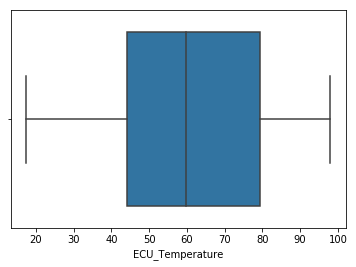

In [29]:
sns.boxplot(x=df_agg_1['ECU_Temperature'])

In [31]:
from scipy.stats import norm
mu, std = norm.fit(df_agg_1['ECU_Temperature'])
print(mu, std)

61.0536007586961 19.28430036058195


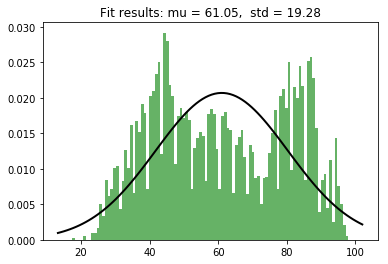

In [35]:
import numpy as np
plt.hist(df_agg_1['ECU_Temperature'], bins=100, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering

wh1 = df_agg_1[['ECU_Temperature','timestamp']]

KeyError: "['timestamp'] not in index"

In [ ]:
ss = StandardScaler()
ss.fit_transform(wh1)

In [ ]:
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

In [ ]:
clust_labels, cent = doKmeans(wh1, 2)
kmeans = pd.DataFrame(clust_labels)
wh1.insert((wh1.shape[1]),'kmeans',kmeans)

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(wh1['timestamp'],wh1['ECU_Temperature'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Timestamp')
ax.set_ylabel('ECU_Temperature')
plt.colorbar(scatter)